In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [83]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_08_L3/'.replace('\\', '/')

files = [
    'raw_19_',
    'raw_20_',
    'raw_21_',
    'raw_22_'
]
labels = [
    'no ts',
    '30°C g = 1',
    '30°C g = 30',
    '30°C g = 300'
]
    
core = []

i = 1 
for file in files:
    c = Core(folder, file+str(i))
    c.k = 10
    c.type = 'diff'
    core.append(c)
    



In [84]:
well = 32700
average = 10

In [85]:
core_int = []
core_std = []

for j, c in enumerate(core):
    intensity = []
    std = []
    print('\n{}'.format(j))
    for i in range(20, len(c)):
        print('\r\t{}'.format(i + 1), end = '')
        
        intensity.append(np.sum(c.frame(i)/c.area*well))
        std.append(np.std(c.frame(i)/c.area*well))
    
    core_int.append(np.array(intensity))
    core_std.append(np.array(std))


0
	255
1
	334
2
	449
3
	468

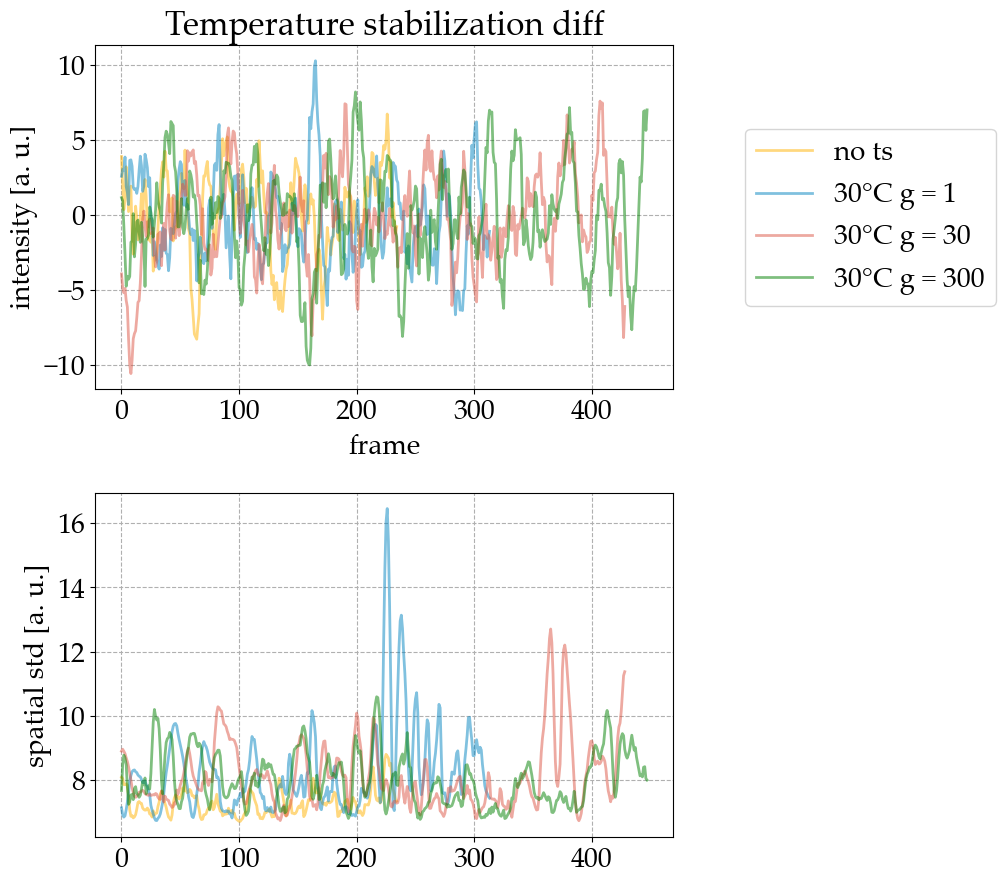

In [87]:
fig, axes_both = plt.subplots(2, 1, figsize=(7, 9), dpi=100)
axes = axes_both[0]


fig.tight_layout(h_pad=2)

axes.set_title('Temperature stabilization {}'.format(core[0].type))
axes.grid(linestyle='--')
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

axes_rel = axes_both[1]
axes_rel.grid(linestyle='--')
axes_rel.set_ylabel('spatial std [a. u.]')

for i, c in enumerate(core):

    axes.plot(core_int[i], linewidth=2, label = labels[i], color = COLORS[i], alpha = 0.5)
    axes_rel.plot(core_std[i]*1e5, linewidth=2, label = labels[i], color = COLORS[i], alpha = 0.5)



lgd = axes.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.savefig('images/temperature_stabilization_{}.png'.format(core[0].type), dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
# fig.savefig('images/temperature_stabilization_int.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
